Text(0.5, 1.0, '한글 타이틀...')

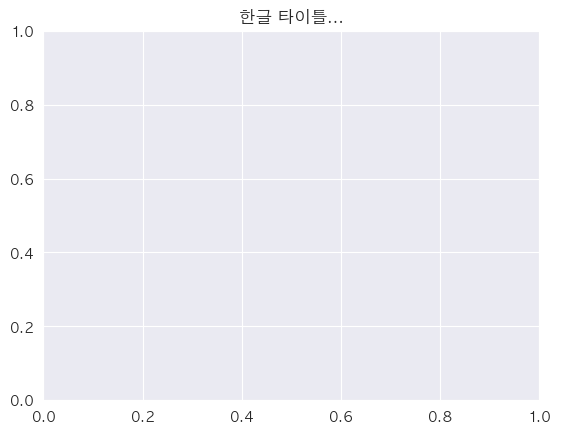

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

# 1. 지도학습 - 분류

### 분류 개념 알아보기
**분류(Classification)** 는 주어진 입력 값이 어떤 클래스에 속할지에 대한 결괏값을 도출하는 알고리즘


- `예) 임의의 데이터에서 어떤 데이터 class A, class B 로 구분하는 알고리즘`

<img src='https://cdn.botpenguin.com/assets/website/Classification_Algorithm_f6b45f3f99.png' width=300>


  - `예) 풍속 4m/s를 기준으로 항공 지연/지연 없음 나누기`  
      ![image](https://user-images.githubusercontent.com/61646760/143068295-b0c06cea-ee9f-4568-aa0a-550573eab5f2.png)



- 다양한 분류 알고리즘이 존재하며, 예측 목표와 데이터 유형에 따라 다양한 머신러닝 모델 적용
  - **트리 구조 기반** : 의사 결정 트리, 랜덤 포레스트
  - **확률 모델 기반** : 나이브 베이즈 분류기
  - **결정 경계 기반** : 선형 분류기, 로지스틱 회귀 분류기, SVM
  - **신경망** : 퍼셉트론, 딥러닝 모델


# 2. 의사 결정 나무

의사결정나무(Decision Tree) 는 스무고개 질문 같이 ...

### - 모델 구조

- **의사 결정 나무(Decision Tree)**
  - 스무 고개와 같이 특정 질문들을 통해 정답을 찾아가는 모델
  - 최상단의 root 마디에서 마지막 끝 마디까지 아래 방향으로 진행

<img src='https://i.imgur.com/FJnIT7J.jpeg' width=500>    


  - 의사 결정 나무 특징
    - 결과가 직관적이며, 해석하기 쉬움
    - 나무 깊이가 깊어질수록 과적합(Overfitting) 문제 발생 가능성이 매우 높음
      - 의사 결정 나무가 너무 깊으면 과적합을 야기할 수 있으므로 깊이의 균형(trade-off)이 중요함
    - 학습이 끝난 트리의 작업 속도가 매우 빠름
    


### - 간단한 의사 결정 나무 만들기

간단한 데이터로 이진의사결정 알고리즘을 사용해서 분류를 진행해 보자.

항공 지연 데이터를 기반으로 간단한 의사 결정 나무를 구현해 보자.

- 항공 지연 데이터는 아래와 같다.  
  ![image](https://user-images.githubusercontent.com/61646760/143177938-106246b4-daf0-4471-8b4d-748ae3ccb662.png)



- 풍속에 따른 지연 여부를 알아내기 위하여 의사 결정 나무인 `binary_tree`의 기준값(`threshold`)을 변경해 가며 완벽하게 지연 여부를 분리할 수 있는 모델을 만들어 보자.  
- thresold 에 따른 지연 여부만 판단한다.

In [26]:
import pandas as pd

# 풍속을 threshold 값에 따라 분리하는 의사결정나무 모델 함수
def binary_tree(data, threshold):
    
    yes = []
    no = []
    
    # data의 풍속 값마다 비교를 하기 위한 반복문
    for wind in data['풍속']:
    
        # threshold 값과 비교하여 분리합니다.
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
    
    # 예측한 결과를 DataFrame 형태로 저장합니다.
    data_yes = pd.DataFrame({'풍속': yes, '예상 지연 여부': ['Yes']*len(yes)})  # yes의 길이만큼 지연 여부에 'Yes'를 넣어줌
    data_no = pd.DataFrame({'풍속': no, '예상 지연 여부': ['No']*len(no)})      # no의 길이만큼 지연 여부에 'No'를 넣어줌
    
    return pd.concat([data_no, data_yes])


In [27]:
# 풍속에 따른 항공 지연 여부 데이터
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

# 위 데이터를 DataFrame 형태로 저장합니다.
data = pd.DataFrame({'풍속': Wind, '지연 여부': Delay})
print(data,'\n')

    풍속 지연 여부
0  1.0    No
1  1.5    No
2  2.5    No
3  5.0   Yes
4  5.5   Yes
5  6.5   Yes 



In [28]:
# binary_tree 모델을 사용하여 항공 지연 여부를 예측합니다.
# (threshold에 값을 넣어서 결과를 확인)
# 지연 여부 == 예상 지연 여부가 되도록 data_pred에 할당
pred = binary_tree(data, threshold=3)
print(pred)

    풍속 예상 지연 여부
0  1.0       No
1  1.5       No
2  2.5       No
0  5.0      Yes
1  5.5      Yes
2  6.5      Yes


- `binary_tree` 함수는 입력하는 `threshold` 풍속을 기준으로 지연 여부를 예측한 결과를 DataFrame 형태로 출력
- `threshold`에 값을 넣어서 결과를 확인 `예) 1, 2, 3.5, …`



## sklearn 의 DecisionTreeClassifier


의사결정나무 모델을 구현하기 위해서는 sklearn의 `DecisionTreeClassifier` 를 지원


- **`DecisionTreeClassifier`**
  - sklearn의 결정 트리 분류기
  - 각 노드에서 불순도를 최소로 노드를 통해 분류
  - 데이터의 <strong>불순도(Impurity)</strong>를 최소화하는 구역으로 나누자!
  - criterion 은 기본이 gini 계수이다.
  - 초기화를 수행할 때 `max_depth`를 설정하여 의사결정나무의 최대 깊이를 조절할 수 있다.
      - `DecisionTreeClassifier(max_depth=2)`


#### - 데이터 전 처리

Iris 데이터는 아래와 같이 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이의 네 가지 변수와 세 종류의 붓꽃 클래스로 구성되어 있다.

In [29]:
from sklearn.datasets import load_iris

# sklearn에 저장된 데이터를 불러옵니다.
X, Y = load_iris(return_X_y = True)

In [30]:
# DataFrame으로 변환
df = pd.DataFrame(X, columns=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이** 네 가지 변수가 주어졌을 때, 어떠한 붓꽃 종류인지 예측하는 분류 모델을 구현해 보자.

우선 데이터를 전 처리하기 위해서 4개의 변수를 갖는 feature 데이터와 `클래스` 변수를 label 데이터로 분리하고 학습용, 평가용 데이터로 나눠 보자.


- `load_iris`로 읽어 온 데이터 `X`에서 `Y`를 바탕으로 `train_test_split`을 사용하여 학습용:평가용 = 8:2 비율로 분리 (`random_state=42` 고정)


In [31]:
# X, Y 학습데이터


In [32]:
from sklearn.model_selection import train_test_split

#1. 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((120, 4), (30, 4), (120,), (30,))

#### - 학습하기

위에서 전 처리한 데이터를 바탕으로 의사결정나무 모델을 학습해 보자.


In [34]:
from sklearn.tree import DecisionTreeClassifier

# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
dt_cls = DecisionTreeClassifier()
dt_cls.fit(train_X, train_Y)

DecisionTreeClassifier()


- sklearn의 `DecisionTreeClassifier()` 모델을 `DTmodel`에 초기화
- `fit`을 사용하여 `train_X`, `train_Y` 데이터를 학습


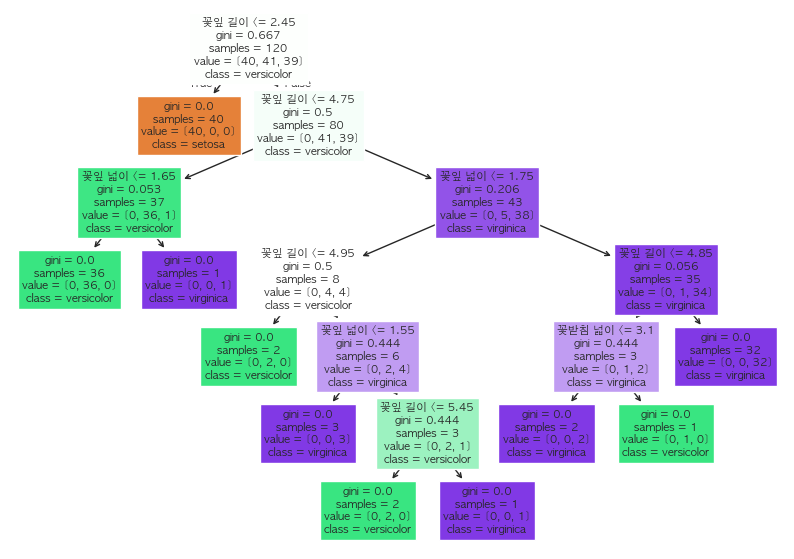

In [35]:
from sklearn.tree import plot_tree

# 학습한 결과를 출력합니다
fig = plt.figure(figsize=(10,7))
tree.plot_tree(
    dt_cls,
    feature_names=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'],
    class_names=['setosa', 'versicolor', 'virginica'],
    filled=True
)


plt.show()

맨 위의 노드를 루프노드라 부르고 맨 아래 끝에 달린 노드를 리프 노드라고 한다.

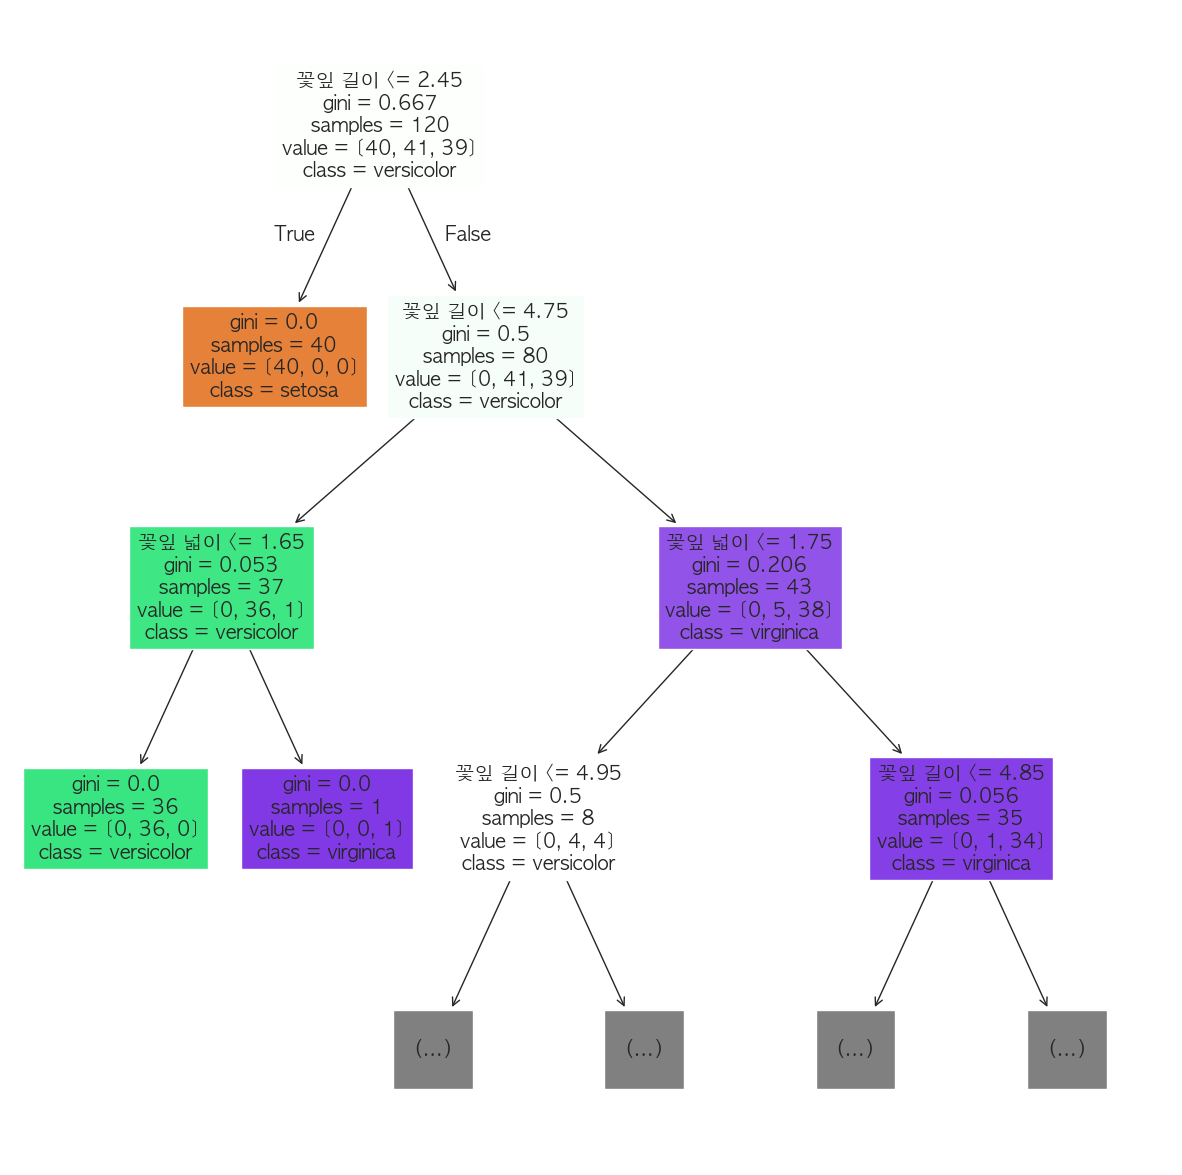

In [36]:
fig = plt.figure(figsize=(15, 15))
tree.plot_tree(
    dt_cls,
    max_depth = 3,
    feature_names=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'],
    class_names=['setosa', 'versicolor', 'virginica'], filled=True
)

plt.show()

1. 루트토드는 꽃잎넓이 0.8 이하면 True, 아니면 False로 왼쪽으로 이동한다.
   - 루트의 샘플은 120개, setosa 40, versicolor 41, virginica 39개 이다.
1. 첫번째 왼쪽 노드는 꽃잎넓이 0.8이하이ㅡ 샘플 40개로 setosa 로 분류된다.
1. 세번째 노드에서 꽃잎넓이 1.75이하의 샘플 43에서 virginica가 38개로 비율이 높아졌다.
   - plot_tree 함수는 클래스의 비율이 높아지면 진한색으로 표시한다

### - 불순도

gini는 지니 불순도(gini impurity)를 의미한다.  지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면된다.

```
지니 불순도 = 1 - (음성 클래스 비율의 제곱 + 양성 클래스 비율의 제곱)
```

DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 gini이다. 
 - creterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 
 - 앞의 루트 노드에서 0.667를 기준으로 왼쪽과 오른쪽 노드로 나누었다. 
 


**불순도(Impurity)**
  - 다른 데이터가 섞여 있는 정도  
     <img src='https://www.baeldung.com/wp-content/uploads/sites/4/2022/06/impurity.png' width=500>
    - 오른쪽이 불순도가 더 낮다.
    - 데이터의 개수가 적기 때문에 눈으로 확인 가능
    - 그렇다면 데이터 개수가 엄청 많을 때 불순도 측정은? 지니 불순도!

**지니 계수(Gini Index)**
  - 해당 구역 안에서 특정 클래스에 속하는 데이터의 비율을 모두 제외한 값
    - 즉, **다양성**을 계산하는 방법

<p align="center">
 <image src="https://user-images.githubusercontent.com/61646760/143277757-abae407c-0f22-40c5-b710-bacd438bf20a.png" />
</p>


**지니 불순도(Gini Impurity)**  
  - [지니 불순도 계산 과정](https://user-images.githubusercontent.com/61646760/143280573-8461ba58-a905-4a97-b744-352b66b28942.png)
    - [가장 낮은 지니 불순도 선택](https://user-images.githubusercontent.com/61646760/143281064-b13eded6-afaf-4edd-9bd9-4d24ab9d4c9d.png)
  - ![image](https://user-images.githubusercontent.com/61646760/143278477-2ada2df1-bfbd-4c72-915a-053669fd9014.png) : i번째 자식 마디의 데이터 개수
  - ![image](https://user-images.githubusercontent.com/61646760/143278540-b07146a0-835b-4026-b6f1-e73fbacc0c5f.png) : 부모 마디의 데이터 개수

<p align="center">
 <image src="https://user-images.githubusercontent.com/61646760/143278422-08459a10-968b-485b-abb0-165366c4d087.png" />  
</p>



### - 예측하기

위에서 학습한 모델을 바탕으로 새로운 데이터에 대해서 예측해 보자.

`test_X` 데이터에 따른 예측값을 구해 보자.


In [37]:
# test_X에 대해서 예측합니다.
pred_X = dt_cls.predict(test_X)

print('test_X에 대한 예측값 : \n{}'.format(pred_X))

test_X에 대한 예측값 : 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [43]:
import numpy as np

if np.array_equal(pred_X, test_Y):
    print("일치합니다") # 예측 정확
else:
    print("일치하지 않습니다") # 예측 부정확

일치합니다


- `DTmodel`을 학습하고 `test_X`의 예측값을 구하여 `pred_X`에 저장




# 3. 분류 평가 지표


#### 혼동 행렬


오차행렬은 아래 같이 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떤 유형을 갖는지 매핑되는지 나타낸다.

<img src='https://i.imgur.com/PXRxI3G.png' width=600>

- **True Positive (TP)** : 실제 Positive인 값을 Positive라고 예측(정답)
- **True Negative (TN)** : 실제 Negative인 값을 Negative라고 예측(정답)
- **False Positive (FP)** : 실제 Negative인 값을 Positive라고 예측(오답) - **1형 오류**
- **False Negative (FN)** : 실제 Positive인 값을 Negative라고 예측(오답) - **2형 오류**

TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능 오류가 어떤 모습으로 발생하는지 알 수 있다. `TN, FP, FN, TP` 기호는 <u>앞 문자는 예측-실제 값이 같은가 틀린가 여부고 뒤 문자는 예측 결과 값이 긍정1/부정0</u> 을 의미한다.

4가지 예측 범주는:
- True Positives : 1인 레이블을 1이라 하는 경우.
    - 관심 범주를 정확하게 분류한 값.
- False Negatives : 1인 레이블을 0이라 하는 경우.
    - 관심 범주가 아닌것으로 잘못 분류함.
- False Positives : 0인 레이블을 1이라 하는 경우.
    - 관심 범주라고 잘못 분류함.
- True Negatives : 0인 레이블을 0이라 하는 경우.
    - 관심 범주가 아닌것을 정확하게 분류.

#### 정확도(Accuracy)


정확도는 모델이 얼마나 정확한지를 평가하는 척도라고 할 수 있다. 
 - 전체 데이터 중에서 제대로 분류된 데이터의 비율로, **모델이 얼마나 정확하게 분류하는지**를 나타냄  
 - 정확도는 예측값과 실제 값이 얼마나 동일한가 비율로 결정
 - 일반적으로 분류 모델의 주요 평가 방법으로 사용됨
 - 그러나, 클래스 비율이 불균형할 경우 평가 지표의 신뢰성을 잃을 가능성이 있음


정확도는 예측이 정확한 비율로 전체 오차행렬 데이터 수로 TP, TN를 나눈 비율이다.


$$
Accuracy = \frac{TN+TP}{TN+FP+FN+TP} \\
$$




오차행렬에서 True에 해당하는 TN, TP에 좌우된다. 

$$
P : TP + FN\\
N : TN + FP\\
$$


#### 오류률

오류률은 예측이 잘못된 비율로 정확도의 반대이다. 

$$
\text{Error rate} = 1 - Accuracy
$$


#### 정밀도(Precision)


정밀도는 예측을 **_Positive로 한 것 중에서 실제 Positive 로 일치한 데이터의 비율_** 이다. 

$$
Precision = \frac{TP}{FP+TP}
$$

분모 FP+TP는 예측을 Positive로 한 모든 데이터 건수이고, TP는 실제 값이 Positive로 일치한 건수이다. 정밀도는 양성 예측율로도 불린다.
- **Negative가 중요한 경우**
    - 즉, 실제로 Negative인 데이터를 Positive라고 판단하면 안 되는 경우 사용되는 지표
    - `예) 스팸 메일 판결을 위한 분류 문제`
      - 해당 메일이 스팸일 경우 Positive, 스팸이 아닐 경우 즉, 일반 메일일 경우 Negative
      - 일반 메일을 스팸 메일(Positive)로 잘못 예측했을 경우 중요한 메일을 전달받지 못하는 상황이 발생할 수 있음 


#### 재현율(Recall, TPR)



정밀도와 비교되는 척도로써, 실제로 Positive인 데이터 중에서 모델이 Positive로 분류한 데이터의 비율
 - FN+TP는 실제 Positive인 모든 건수이고, 분자 TP는 실제 값이 Positive로 일치한 것이다. 재현율은 민감도(sensitivity), TPR(True Positive Rate)라고도 불린다.

$$
Recall = \frac{TP}{FN+TP}
$$

- **Positive가 중요한 경우**
    - 즉, 실제로 Positive인 데이터를 Negative라고 판단하면 안 되는 경우 사용되는 지표
    - `예) 악성 종양 여부 판결을 위한 검사`
      - 악성 종양일 경우 Positive, 악성 종양이 아닐 경우 즉, 양성 종양일 경우 Negative
      - 악성 종양(Positive)을 양성 종양(Negative)으로 잘못 예측했을 경우 제때 치료를 받지 못하게 되어 생명이 위급해질 수 있음


#### 다양한 분류 지표의 활용
분류 목적에 따라 다양한 지표를 계산하여 평가
- 분류 결과를 전체적으로 보고 싶다면 → **혼동 행렬(Confusion Matrix)**
- 정답을 얼마나 잘 맞췄는지 → **정확도(Accuracy)**
- FP 또는 FN의 중요도가 높다면 → **정밀도(Precision)**, **재현율(Recall)**



### - "실습" 유방암 데이터 평가지표 활용

### Scikit-learn 의 api:

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.f1_score
- sklearn.metrics..fbeta_score
- sklearn.metrics.matthews_corrcoef
- sklearn.metrics.confusion_matrix

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [46]:
# sklearn에 저장된 데이터를 불러 옵니다.
X,Y = load_breast_cancer(return_X_y=True)

In [47]:
# 데이터 정보를 출력합니다
print('전체 샘플 개수: ',len(X))
print('X의 feature 개수: ',len(X[0]))


전체 샘플 개수:  569
X의 feature 개수:  30


In [49]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [51]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
np.unique(Y)

array([0, 1])

In [56]:
# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
len(test_Y), sum(test_Y)

(114, 71)

In [58]:
# 분리된 평가용 데이터 정보를 출력합니다
print('평가용 샘플 개수: ',len(test_Y))
print('클래스 0인 평가용 샘플 개수: ', len(test_Y)-sum(test_Y))
print('클래스 1인 평가용 샘플 개수: ', sum(test_Y),'\n')  # 샘플당 값이 1이므로 sum = 개수

평가용 샘플 개수:  114
클래스 0인 평가용 샘플 개수:  43
클래스 1인 평가용 샘플 개수:  71 



In [59]:
# DTmodel에 의사결정나무 모델을 초기화하고 학습합니다
dt_cls = DecisionTreeClassifier()
dt_cls.fit(train_X, train_Y)

DecisionTreeClassifier()

In [61]:
# test_X을 바탕으로 예측한 값을 저장합니다
pred_test = dt_cls.predict(test_X)

In [62]:
test_Y[0], pred_test[0]

(1, 1)

In [63]:
test_Y[99], pred_test[99]

(0, 0)

### 혼동 행렬 계산하기

- sklearn 안에는 위 4개 평가 값을 얻기 위해 사용할 수 있는 기능이 정의되어 있다.
  - `confusion_matrix(y_true, y_pred)`
    - Confusion matrix의 값을 `np.ndarray`로 반환해 준다.


`sklearn.metrics.confusion_matrix()`

```python
sklearn.metrics.confusion_matrix(Y, predictions)
```

사이킷런에서 `sklearn.metrics.confusion_matrix()` 로 결과를 2x2 배열 형태로 왼쪽 오른쪽 순서로 TN, FP, FN, TP 로 출력해 준다.

- `load_breast_cancer`
    - 유방암 유무 판별 데이터를 불러오는 함수
    - `X` (Feature 데이터) : 30개의 환자 데이터
    - `Y` (Label 데이터) : 0 음성(악성), 1 양성(정상)


이번 실습에서는 2개의 클래스를 가진 분류 데이터를 이용하여 혼동 행렬을 직접 출력해 보고, 확인해 보자.

In [65]:
# 혼동 행렬을 계산합니다

cm = confusion_matrix(test_Y, pred_test)
print('Confusion Matrix : \n {}'.format(cm))


Confusion Matrix : 
 [[39  4]
 [ 3 68]]


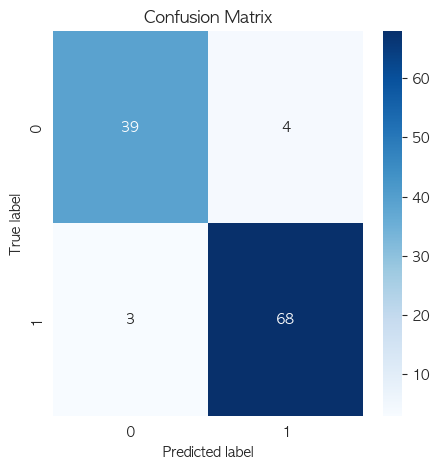

In [69]:
# 혼동 행렬의 heatmap 출력합니다
fig = plt.figure(figsize=(5,5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
plt.show()


#### 정확도(Accuracy) 계산하기

위의 결과를 바탕으로 분류 성능에 간단하면서도 중요한 정확도를 계산하여 모델의 성능을 판별해 보자.

이번 실습에서는 학습용 데이터와 평가용 데이터의 정확도를 계산하고 그 성능을 비교해 보겠다.


In [71]:
# train_X, test_X 각각 예측한 값을 저장합니다
pred1 = dt_cls.predict(train_X)
pred2 = dt_cls.predict(test_X)

# 혼동 행렬을 계산합니다
cm_train = confusion_matrix(train_Y, pred1)
cm_test = confusion_matrix(test_Y, pred2)

print('train_X Confusion Matrix : \n {}'.format(cm_train))
print('test_X Confusion Matrix : \n {}'.format(cm_test))


train_X Confusion Matrix : 
 [[169   0]
 [  0 286]]
test_X Confusion Matrix : 
 [[39  4]
 [ 3 68]]


In [83]:
# train_X, train_Y 정확도를 계산합니다.
dt_cls.score(train_X, train_Y)

1.0

In [84]:
dt_cls.score(test_X, test_Y)

0.9385964912280702

In [85]:
accuracy_score(train_Y, pred1)  # 위와 동일

1.0

In [86]:
# test_X, test_Y 정확도를 계산합니다.
accuracy_score(test_Y, pred2)     # 위와 동일

0.9385964912280702


- `score`를 사용하여 `train_X`에 대한 정확도를 계산하여 `acc_train`에 저장
- `score`를 사용하여 `test_X`에 대한 정확도를 계산하여 `acc_test`에 저장



#### 정밀도(Precision), 재현율(Recall) 계산하기

위의 결과를 바탕으로 분류 지표 중 정밀도와 재현율을 계산하여 모델의 성능을 판별해 보자.

이번 실습에서는 학습용 데이터와 평가용 데이터의 정밀도와 재현율을 계산하고 그 성능을 비교해 보겠다.

- 정밀도와 재현율 계산을 위한 sklearn 함수
  - **`precision_score(train_Y, y_pred_train)`**
    - 학습용 데이터에 대한 정밀도(precision) 값을 계산
  - **`recall_score(train_Y, y_pred_train)`**
    - 학습용 데이터에 대한 재현율(recall) 값을 계산
  - `load_breast_cancer`
    - 유방암 유무 판별 데이터를 불러오는 함수
    - `X`(Feature 데이터) : 30개의 환자 데이터
    - `Y`(Label 데이터) : 0 음성(악성), 1 양성(정상)

```


In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [89]:
#1. 정밀도를 계산합니다.
precision_train = precision_score(train_Y, pred1)
precision_test = precision_score(test_Y, pred2)

# 정밀도를 출력합니다.
print('train_X Precision: %f'%precision_train)     # train_X Precision: 1.000000
print('test_X Precision: %f'%precision_test,'\n')  # test_X Precision: 0.944444

#2. 재현율을 계산합니다.
recall_train = recall_score(train_Y, pred1)
recall_test = recall_score(test_Y, pred2)

# 재현율을 출력합니다.
print('train_X Recall: %f'%recall_train)  # train_X Recall: 1.000000
print('test_X Recall: %f'%recall_test)    # test_X Recall: 0.957746

train_X Precision: 1.000000
test_X Precision: 0.944444 

train_X Recall: 1.000000
test_X Recall: 0.957746


```

- `precision_score`를 사용하여 학습용, 평가용 데이터에 대한 정밀도를 계산하여 `precision_train`, `precision_test`에 저장
- `recall_score`를 사용하여 학습용, 평가용 데이터에 대한 재현율을 계산하여 `recall_train`, `recall_test`에 저장


### Classification Report

sklear.metrics.classification_report 는 평가 정보를 제공할 수 있다.

In [92]:
from sklearn.metrics import classification_report
result = classification_report(test_Y, pred2)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

